In [1]:
import pandas as pd   


data = pd.read_excel('WalmartSales.xlsx')
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46:00,Ewallet,6.2
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16:00,Ewallet,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22:00,Cash,7.7
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33:00,Cash,4.1


In [2]:
data.isna().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

### A) Analyze the performance of sales and revenue at the city and branch level ( 5 marks)

In [4]:
# Total revenue means we need to multiply quantity * unit price
data['Revenue'] = data['Quantity'] * data['Unit price']


sales_revenue_performance = data.groupby(['City', 'Branch']).agg(Total_sales = 
('Quantity','sum'), Total_Revenue = ('Revenue','sum')).reset_index()

sales_revenue_performance

,City,Branch,Total_sales,Total_Revenue
0,Mandalay,A,637,34130.09
1,Mandalay,B,664,37215.93
2,Mandalay,C,519,29794.62
3,Naypyitaw,A,648,35985.64
4,Naypyitaw,B,604,35157.75
5,Naypyitaw,C,579,34160.14
6,Yangon,A,598,33647.27
7,Yangon,B,631,35193.51
8,Yangon,C,630,32302.43


### B. What is the average price of an item sold at each branch of the city (10 marks)

In [ ]:
average_price_by_branch = data.groupby(['City','Branch']).agg(Average_price = ('Unit price','mean')).reset_index()
average_price_by_branch


,City,Branch,Average_price
0,Mandalay,A,53.353866
1,Mandalay,B,56.133305
2,Mandalay,C,57.958316
3,Naypyitaw,A,54.123182
4,Naypyitaw,B,57.785688
5,Naypyitaw,C,57.941009
6,Yangon,A,55.639298
7,Yangon,B,56.011062
8,Yangon,C,52.684602


### C. Analyze the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method, and identify the focus areas to get better sales for April 2019. (15 marks)

In [ ]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract month and year from the date
data['YearMonth'] = data['Date'].dt.to_period('M')

# Group by YearMonth, Product line
monthly_performance_by_product_line = data.groupby(['YearMonth', 'Product line']).agg(
    Total_Sales=('Quantity', 'sum'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()

monthly_performance_by_product_line

,YearMonth,Product line,Total_Sales,Total_Revenue
0,2019-01,Electronic accessories,333,17934.56
1,2019-01,Fashion accessories,336,18423.92
2,2019-01,Food and beverages,325,18638.60
3,2019-01,Health and beauty,254,15603.02
4,2019-01,Home and lifestyle,342,19518.80
5,2019-01,Sports and travel,375,20635.26
6,2019-02,Electronic accessories,313,16536.10
7,2019-02,Fashion accessories,295,18104.63
8,2019-02,Food and beverages,349,19047.96
9,2019-02,Health and beauty,266,13906.91


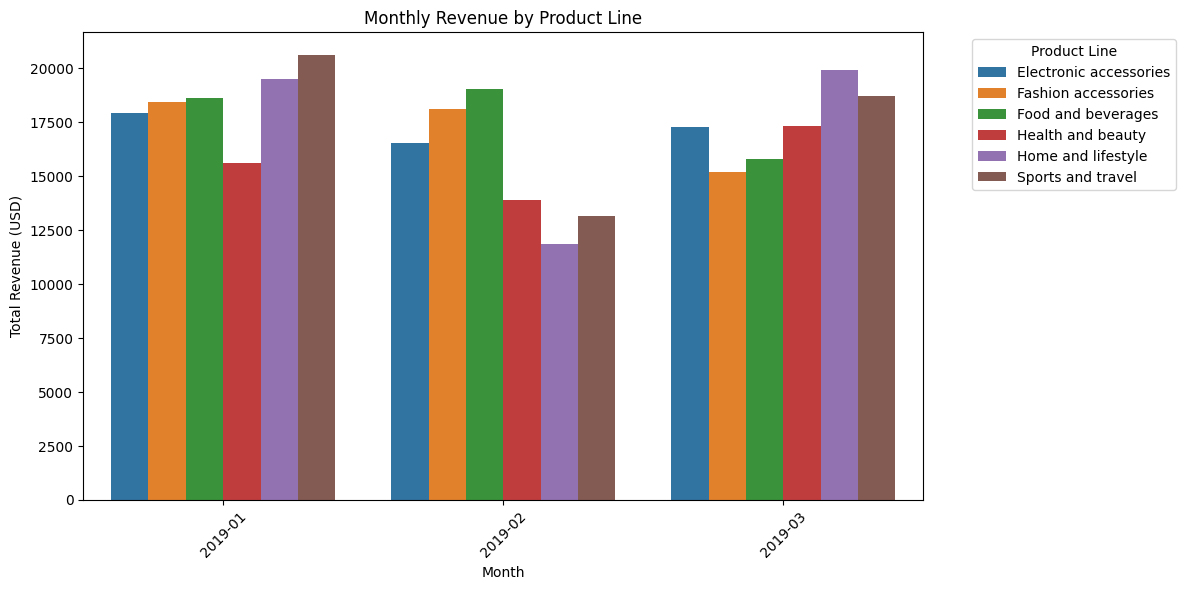

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_performance_by_product_line, x='YearMonth', y='Total_Revenue', hue='Product line')

# Adding labels and title
plt.title('Monthly Revenue by Product Line')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:

# Group by YearMonth, Product line
monthly_performance_by_gender = data.groupby(['YearMonth', 'Gender']).agg(
    Total_Sales=('Quantity', 'sum'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()

monthly_performance_by_gender

,YearMonth,Gender,Total_Sales,Total_Revenue
0,2019-01,Female,1019,56322.84
1,2019-01,Male,946,54431.32
2,2019-02,Female,951,53652.91
3,2019-02,Male,703,38936.97
4,2019-03,Female,899,49912.75
5,2019-03,Male,992,54330.59


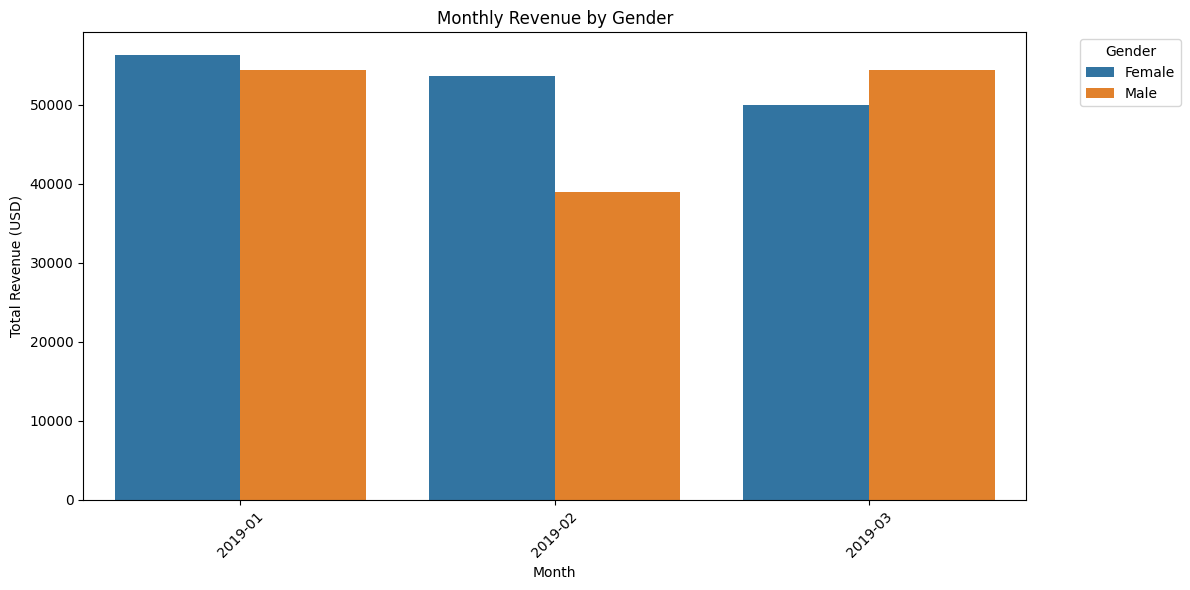

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_performance_by_gender, x='YearMonth', y='Total_Revenue', hue='Gender')

# Adding labels and title
plt.title('Monthly Revenue by Gender')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:

# Group by YearMonth, Product line
monthly_performance_by_payment_type = data.groupby(['YearMonth', 'Payment']).agg(
    Total_Sales=('Quantity', 'sum'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()

monthly_performance_by_payment_type

,YearMonth,Payment,Total_Sales,Total_Revenue
0,2019-01,Cash,708,39781.03
1,2019-01,Credit card,622,36425.31
2,2019-01,Ewallet,635,34547.82
3,2019-02,Cash,596,34044.13
4,2019-02,Credit card,505,29866.69
5,2019-02,Ewallet,553,28679.06
6,2019-03,Cash,592,33038.24
7,2019-03,Credit card,595,29676.64
8,2019-03,Ewallet,704,41528.46


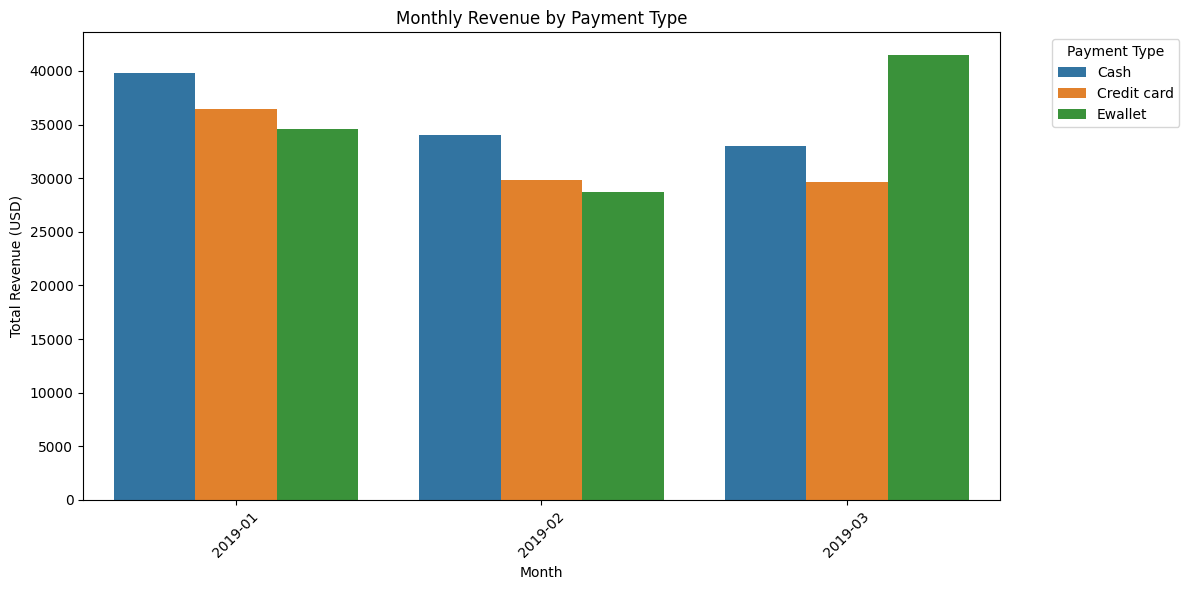

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_performance_by_payment_type, x='YearMonth', y='Total_Revenue', hue='Payment')

# Adding labels and title
plt.title('Monthly Revenue by Payment Type')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# Group by YearMonth, Product line, Gender, and Payment method
monthly_performance = data.groupby(['YearMonth', 'Product line', 'Gender', 'Payment']).agg(
    Total_Sales=('Quantity', 'sum'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()
monthly_performance

,YearMonth,Product line,Gender,Payment,Total_Sales,Total_Revenue
0,2019-01,Electronic accessories,Female,Cash,52,2731.86
1,2019-01,Electronic accessories,Female,Credit card,54,3045.42
2,2019-01,Electronic accessories,Female,Ewallet,43,1576.48
3,2019-01,Electronic accessories,Male,Cash,62,3380.29
4,2019-01,Electronic accessories,Male,Credit card,43,2248.65
...,...,...,...,...,...,...
103,2019-03,Sports and travel,Female,Credit card,52,2863.86
104,2019-03,Sports and travel,Female,Ewallet,53,3398.57
105,2019-03,Sports and travel,Male,Cash,36,2084.19
106,2019-03,Sports and travel,Male,Credit card,60,3633.90


In [ ]:
# Group by YearMonth, Product line, Gender, and Payment method
monthly_performance = data.groupby(['YearMonth', 'Product line', 'Gender']).agg(
    Total_Sales=('Quantity', 'sum'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()
monthly_performance

,YearMonth,Product line,Gender,Total_Sales,Total_Revenue
0,2019-01,Electronic accessories,Female,149,7353.76
1,2019-01,Electronic accessories,Male,184,10580.80
2,2019-01,Fashion accessories,Female,197,10856.57
3,2019-01,Fashion accessories,Male,139,7567.35
4,2019-01,Food and beverages,Female,169,11462.33
5,2019-01,Food and beverages,Male,156,7176.27
6,2019-01,Health and beauty,Female,96,5123.84
7,2019-01,Health and beauty,Male,158,10479.18
8,2019-01,Home and lifestyle,Female,198,10705.03
9,2019-01,Home and lifestyle,Male,144,8813.77


In [ ]:
monthly_performance.columns

Index(['YearMonth', 'Product line', 'Gender', 'Total_Sales', 'Total_Revenue'], dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_performance_by_payment_type, x='YearMonth', y='Total_Revenue', hue='Payment')

# Adding labels and title
plt.title('Monthly Revenue by Payment Type')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


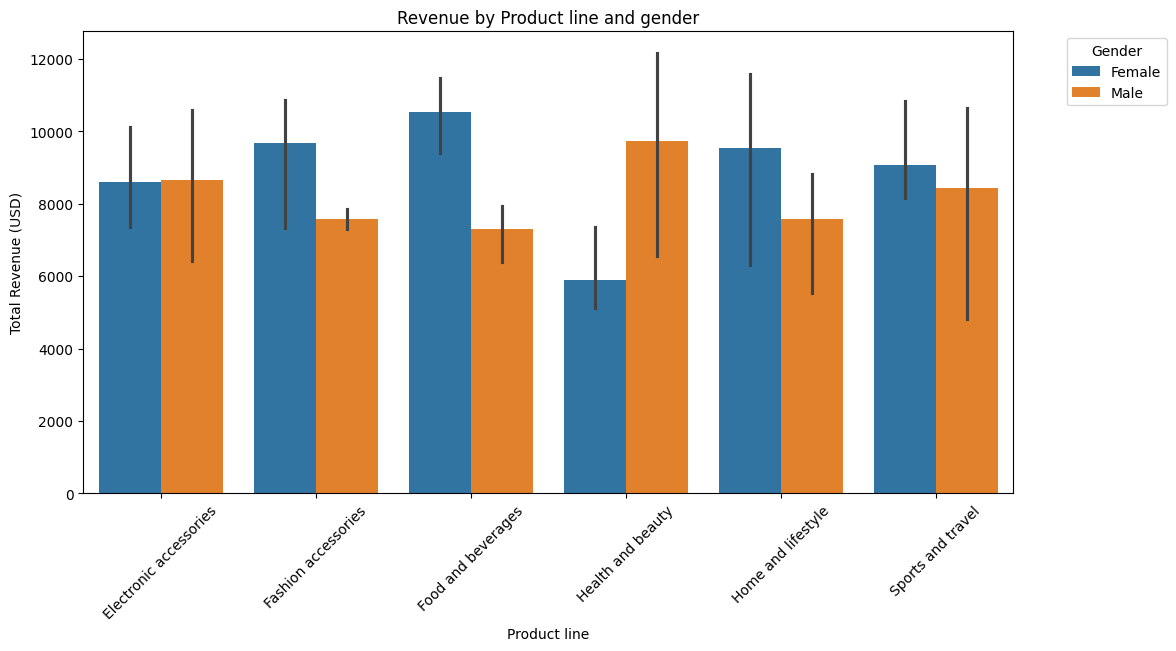

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_performance,x='Product line',y='Total_Revenue',hue='Gender')

# Adding labels and title
plt.title('Revenue by Product line and gender')
plt.xlabel('Product line')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()